# Drone Flight Stability Prediction using ANN

This notebook outlines the process of building an Artificial Neural Network (ANN) model to predict the stability of SkyXplorer drones based on sensor data. The steps include data preparation, model design, training, hyperparameter tuning, evaluation, and insights extraction.

## Step 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
url = "https://drive.google.com/uc?id=1vQqYpizF80HMV4DI4BtHlA2gWADD5jaU"
df = pd.read_csv(url)

# Separate target variable
X = df.drop('stability', axis=1)
y = df['stability']

In [11]:
# Check for data types, distributions, and outliers
print(X.info())
print(X.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   altitude               150000 non-null  float64
 1   speed                  150000 non-null  float64
 2   battery_voltage        150000 non-null  float64
 3   wind_speed             150000 non-null  float64
 4   gps_signal_strength    150000 non-null  float64
 5   motor_temperature      150000 non-null  float64
 6   rotor_rpm              150000 non-null  float64
 7   yaw                    150000 non-null  float64
 8   pitch                  150000 non-null  float64
 9   roll                   150000 non-null  float64
 10  signal_to_noise_ratio  150000 non-null  float64
 11  weather_condition      150000 non-null  int64  
 12  flight_mode            150000 non-null  int64  
 13  proximity_alert        150000 non-null  int64  
 14  rotor_efficiency       150000 non-nu

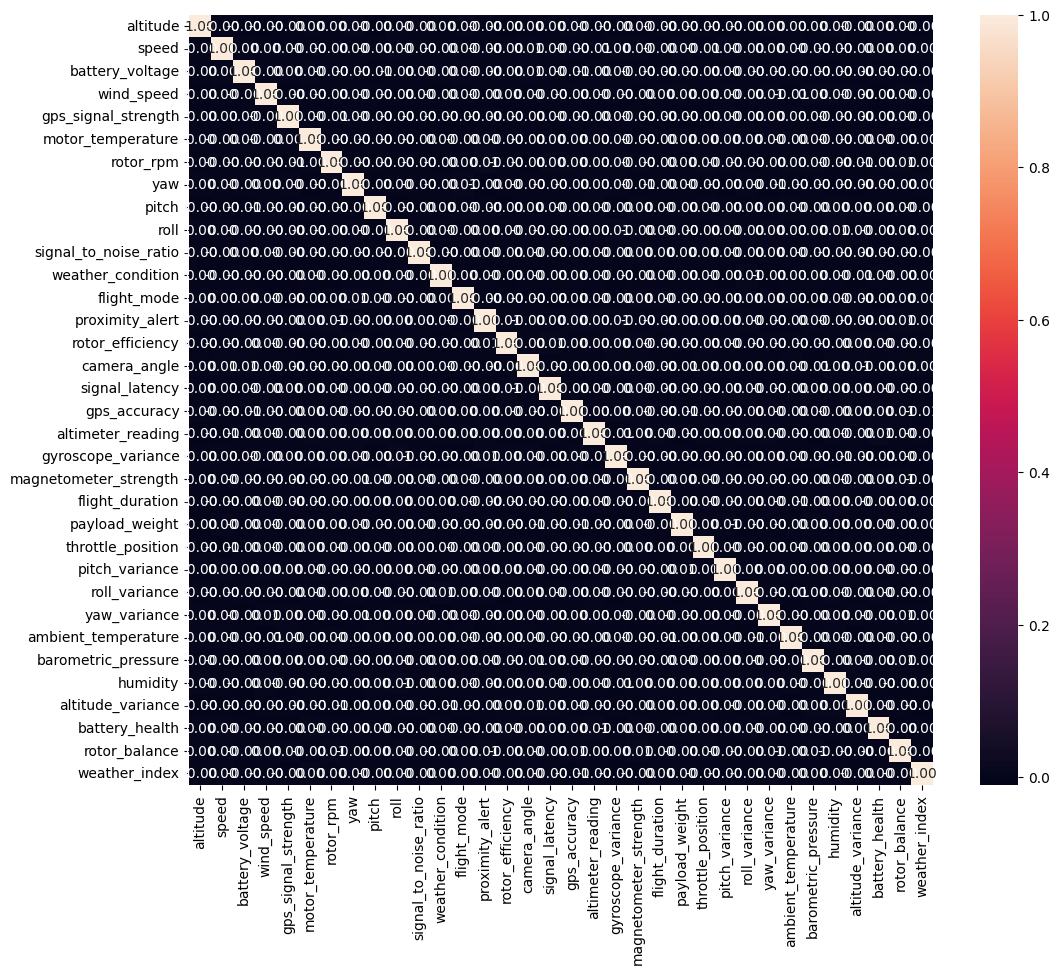

In [12]:
# Visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [3]:
# Check for missing values
print(X.isnull().sum())

# Fill missing values if any (using mean for numerical features)
X.fillna(X.mean(), inplace=True)

altitude                 0
speed                    0
battery_voltage          0
wind_speed               0
gps_signal_strength      0
motor_temperature        0
rotor_rpm                0
yaw                      0
pitch                    0
roll                     0
signal_to_noise_ratio    0
weather_condition        0
flight_mode              0
proximity_alert          0
rotor_efficiency         0
camera_angle             0
signal_latency           0
gps_accuracy             0
altimeter_reading        0
gyroscope_variance       0
magnetometer_strength    0
flight_duration          0
payload_weight           0
throttle_position        0
pitch_variance           0
roll_variance            0
yaw_variance             0
ambient_temperature      0
barometric_pressure      0
humidity                 0
altitude_variance        0
battery_health           0
rotor_balance            0
weather_index            0
dtype: int64


In [4]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

In [5]:
# Encode the target variable
y = pd.get_dummies(y, drop_first=False)

In [6]:
# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42)  # 70-15-15 split

## Step 2: ANN Model Design

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 3: Training and Hyperparameter Tuning

In [8]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5562 - loss: 0.8720 - val_accuracy: 0.8994 - val_loss: 0.2515
Epoch 2/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8653 - loss: 0.3082 - val_accuracy: 0.9296 - val_loss: 0.1671
Epoch 3/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9013 - loss: 0.2302 - val_accuracy: 0.9360 - val_loss: 0.1530
Epoch 4/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9136 - loss: 0.2027 - val_accuracy: 0.9398 - val_loss: 0.1475
Epoch 5/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9192 - loss: 0.1877 - val_accuracy: 0.9381 - val_loss: 0.1463
Epoch 6/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9242 - loss: 0.1758 - val_accuracy: 0.9381 - val_loss: 0.1469
Epoch 7/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9285 - loss: 0.1657 - val_accuracy: 0.9357 - val_loss: 0.1485
Epoch 8/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9322 - loss: 0.1582 - val_accu

## Step 4: Evaluate the Model

In [10]:
# Load the best model
model.load_weights('best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

print(classification_report(y_true_classes, y_pred_classes))
print(confusion_matrix(y_true_classes, y_pred_classes))

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9461 - loss: 0.1273
Test Accuracy: 0.9454222321510315
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7465
           1       0.97      0.95      0.96      7545
           2       0.89      0.95      0.92      7490

    accuracy                           0.95     22500
   macro avg       0.95      0.95      0.95     22500
weighted avg       0.95      0.95      0.95     22500

[[7016    0  449]
 [   0 7142  403]
 [ 160  216 7114]]


In [13]:
# Investigate misclassified instances
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]
print(f'Misclassified instances: {misclassified_indices}')

Misclassified instances: [   69    82    85 ... 22399 22457 22462]


 Investigate misclassified instances
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]

 Assuming X_test is a pandas DataFrame or NumPy array
misclassified_instances = X_test[misclassified_indices]

 Create a DataFrame for display
misclassified_df = pd.DataFrame(misclassified_instances)
misclassified_df['predicted_label'] = y_pred_classes[misclassified_indices]
misclassified_df['true_label'] = y_true_classes[misclassified_indices]

 Reset index for better readability
misclassified_df = misclassified_df.reset_index(drop=True)
misclassified_df.index.name = 'Instance Number'  

 Display the DataFrame
print("Misclassified Instances:")
display(misclassified_df)


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Mean Squared Error: 0.02615896426141262
Mean Absolute Error: 0.05774930492043495
R-squared: 0.8822636008262634


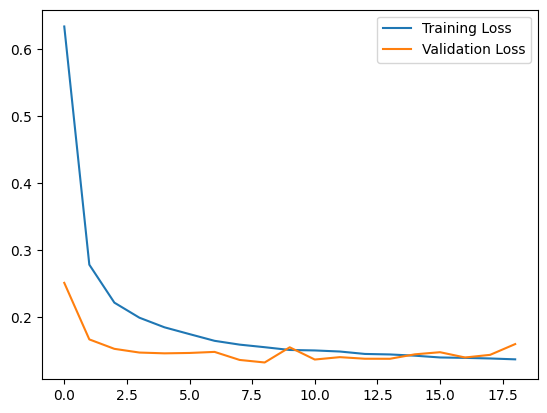

In [17]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


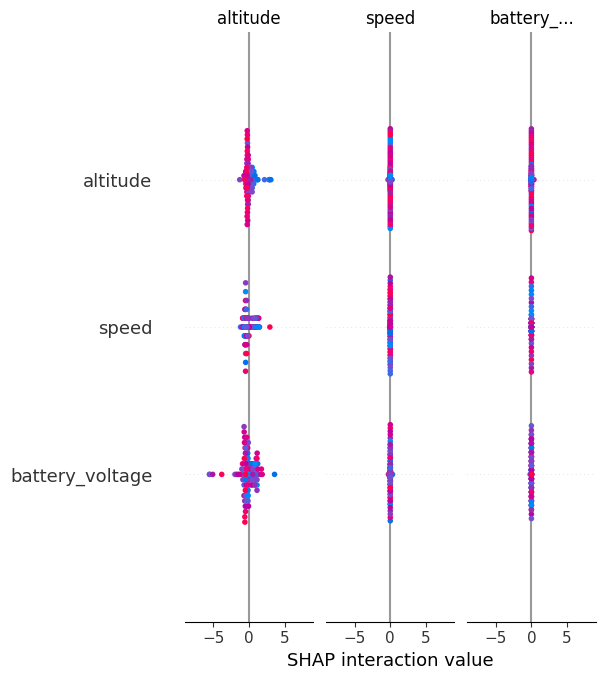

In [14]:
# Use SHAP for feature importance
import shap

# Limit background data samples to 1000 random samples
background = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]

explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_test[:100])  # Limit to 100 samples for quick execution

shap.summary_plot(shap_values, X_test[:100], feature_names=X.columns)

## Step 5: Insights and Recommendations

### 1. Identify Key Features
Based on the SHAP summary plot, identify key features that strongly influence stability.

### 2. Operational Suggestions
Suggest ways to optimize configurations or operational limits based on key features.

### 3. Design Improvements
Recommend adjustments to hardware or software for better performance under challenging conditions.

## Step 6: Deliverables

### 1. Code
Provide a well-documented Jupyter notebook or Python script containing all the steps.

### 2. Report
Include data exploration findings, model architecture details, and performance metrics.
Provide actionable insights and recommendations.